
<table>
<tr>
<td width=15%><img src="./img/UGA.png"></img></td>
<td><center><h1>Introduction to Python for Data Sciences</h1></center></td>
<td width=15%><a href="http://www.iutzeler.org" style="font-size: 16px; font-weight: bold">Franck Iutzeler</a> </td>
</tr>
</table>



<br/><br/>

<center><a style="font-size: 40pt; font-weight: bold">Chap. 4 - Scikit Learn </a></center> 

<br/><br/>



# 1- Scikit Learn



Now that we explored data structures provided by the Pandas library, we will investigate how to learn over it using **Scikit-learn**.

Scikit-learn is ont of the most celebrated and used machine learning library. It features a complete set of efficiently implemented machine learning algorithms for classification, regression, and clustering. Scikit-learn is designed to operate over Numpy, Scipy, and Pandas data structures.  

**Links:** [Scikit-learn webpage](http://scikit-learn.org)  [Wikipedia article](https://en.wikipedia.org/wiki/Scikit-learn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Machine Learning problems

*Machine learning* is the task of predicting properties out of some data. The *dataset* consists in several *examples* or *samples* and the associated target properties can be available, partially available, or not at all; we respectively call these setting *supervised*, *semi-supervised*, *unsupervised*. The examples are made out of one or several *features* or *attributes* that can be of different types (real number, discretes values, strings, booleans, etc.). 

Learning problems can be broadly divided in a few categories:
* **supervised learning** 
  *  **classification:** Place incoming data into a finite number or classes by learning over labeled data. Example: Classifying iris into species based on recorded petal and sentil sizes from the 3 species. 
  *  **regression:** Predict a value from example data. To the difference of classification, the output value is continuous. Example: Predict the carbon monoxide concentration for next years based on previous measures.
* **unsupervised learning**
  *  **clustering:** Place the data (both new and the dataset) into a finite number of classes. To the difference with classification, no labeled data is provided. Example: Create market segments from customer information for targeted advertising.
  *  **dimension reduction:** Discard uniformative features for the purpose of visualization or efficient storage. Example: Creation of eigenfaces in visage recognition.  
   

The following flowchart can be found on the [Scikit Learn website](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html):

![Scikit Learn Algorithm cheatsheet](img/ml_map.png "Scikit Learn Algorithm cheatsheet")


## Learning with Scikit Learn

The process of learning and predicting with Scikit Learn follows three main steps:<br/>
**1. Selecting and adjusting a model**<br/>
**2. Fitting the model to the data**<br/>
**3. Predicting from this fitted model**

We will illustrate this process on a simple *linear model*
$$ y = a x + b + \nu$$
where 
* $(x,y)\in\mathbb{R}^m\times\mathbb{R}^m$ are the data points. $x$ contains the examples and $y$ the associated outputs  
* $a,b$ are the model coefficients to estimate
* $\nu$ is a standard centered white Gaussian noise

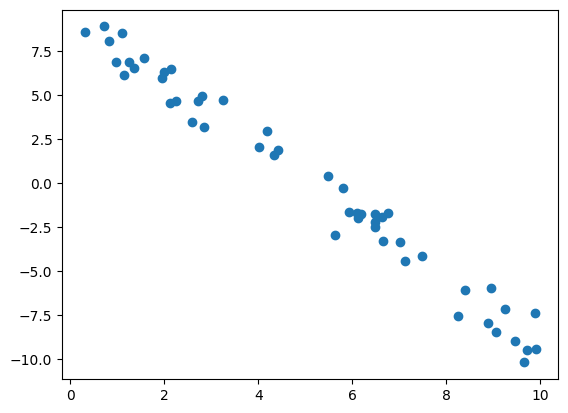

In [2]:
a = np.random.randn()*5             # Drawing randomly the slope
b = np.random.rand()*10             # Drawing randomly the initial point

m = 50                              # number of points

x = np.random.rand(m,1)*10          # Drawing randomly abscisses
y = a*x + b + np.random.randn(m,1)  # y = ax+b + noise

plt.scatter(x, y)

### 1. Selecting and adjusting a model

As we want to fit a linear model $y=ax+b$ through the data, we will import the `Linear Regression` module from scikit learn with `sklearn.linear_model import LinearRegression`.

As our model has a non null coefficient at the origin, the model needs an *intercept*. This can be tuned, along with several other parameters, see Scikit Learn's  [linear_model documentation](http://Scikit-Learn.org/stable/modules/linear_model.html).

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
print(model)

LinearRegression()


This terminates our model tuning. Notice that we have described our model, but no learning or fitting has been done.

### 2. Fitting the model to the data


Applying our model to the data $(x,y)$ is done using the `fit` method.

In [4]:
model.fit(x,y)

LinearRegression()

Once the model is fitted, one can observe the learned coefficients:
* `coef_` for the model coefficients ($a$ here)
* `intercept_` foe the intercept ($b$ here)

In [5]:
print("Learned coefficients: a = {:.6f} \t b = {:.6f}".format(float(model.coef_),float(model.intercept_)))
print("True coefficients:    a = {:.6f} \t b = {:.6f}".format(a,b))

Learned coefficients: a = -1.888075 	 b = 9.651957
True coefficients:    a = -1.921052 	 b = 9.878758


C:\Users\garan\AppData\Local\Temp\ipykernel_10212\1550407732.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Learned coefficients: a = {:.6f} \t b = {:.6f}".format(float(model.coef_),float(model.intercept_)))


### 3. Predicting from this fitted model

From a feature matrix, the method `predict` returns the predicted output from the fitted model. 

In [6]:
xFit = np.linspace(-2,12,21).reshape(-1, 1)

In [7]:
yFit = model.predict(xFit)

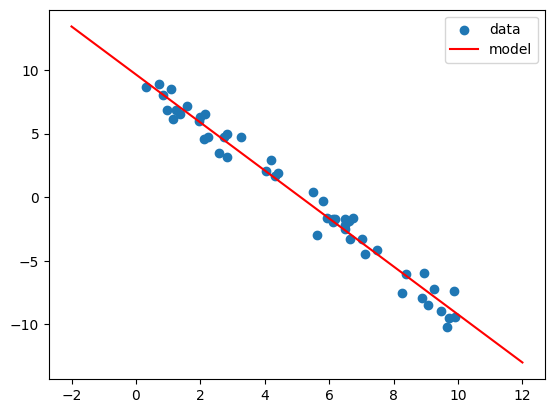

In [8]:
plt.scatter(x, y , label="data")
plt.plot(xFit, yFit , label="model",color="r")
plt.legend()

## Preprocessing Data


### Data format

Scikit Learn can take as an input (*i.e.* passed to `fit` and `predict`) several format including:
* Numpy arrays. **Warning:** the data *has* to be **2D** even if there is only one example or one feature.
* Pandas dataframes.
* SciPy sparse matrices.

The *examples/samples* of the datasets are stored as *rows*.<br/>
The *features* are the *columns*.

### Training/Testing sets

In order to *cross-validate* our model, it is customary to split the dataset into training and testing subsets. It can be done manually but there is also a dedicated method.

In [9]:
from sklearn.model_selection import train_test_split


xTrain, xTest, yTrain, yTest = train_test_split(x,y)

In [10]:
print(xTrain.shape,yTrain.shape)
print(xTest.shape,yTest.shape)

(37, 1) (37, 1)
(13, 1) (13, 1)


Let us use cross validation to compare linear model and linear model with intercept.

In [11]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept=True)
model2 = LinearRegression(fit_intercept=False)

model1.fit(xTrain,yTrain)
yPre1 = model1.predict(xTest)
error1 = np.linalg.norm(yTest-yPre1)

model2.fit(xTrain,yTrain)
yPre2 = model2.predict(xTest)
error2 = np.linalg.norm(yTest-yPre2)

print("Testing Error with intercept:", error1, "\t without intercept:" ,error2)

Testing Error with intercept: 2.692425311679383 	 without intercept: 16.62072511012684


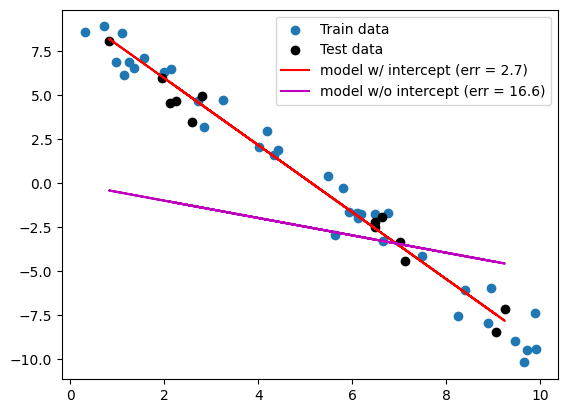

In [12]:
plt.scatter(xTrain, yTrain ,  label="Train data")
plt.scatter(xTest, yTest , color= 'k' , label="Test data")
plt.plot(xTest, yPre1 , color='r', label="model w/ intercept (err = {:.1f})".format(error1))
plt.plot(xTest, yPre2 , color='m', label="model w/o intercept (err = {:.1f})".format(error2))
plt.legend()

### Performance metrics

In order to quantitatively evaluate the models, Scikit Learn provide a wide range of [metrics](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics), we will see some of them in the following examples.